# SC1015 Mini-Project

Group: 2, FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H

### Final Attribute Information

1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp` changed to `chest_pain`: Chest pain type (4 values) (Categorical)
4. `trestbps` changed to `blood_pressure`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol` changed to `cholesterol`: Serum cholesterol in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs` changed to `fasting_blood_sugar`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg` changed to `resting_ecg_result`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach` changed to `max_heart_rate`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang` changed to `exercise_induced_angina`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak` changed to `st_depression`: ST depression induced by exercise relative to rest (Numerical)
11. `new_st_depression`: The presence of ST depression induced by exercise relative to rest (0 = no; 1 = yes) (Categorical)
12. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
13. `ca` changed to `num_affected_vessels`: Number of major vessels (0-3) colored by fluoroscopy (Categorical)
14. `thal` changed to `defect_type`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
15. `target` changed to `heart_disease`: 0 = no heart disease; 1 = heart disease (Categorical)
16. `exercise_problem`: 0 = no exercise problem; 1 = exercise problem (Categorical)

### Essential Libraries

Let us begin by importing the essential Python Libraries for Data Extraction and Cleaning.

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization \
Scikit Learn: Machine learning algorithms and Data Visualization

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,ConfusionMatrixDisplay,confusion_matrix,accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

### Import the Dataset

We will be importing our clean_data.csv dataset that we previously saved.\
Dataset is a cleaned version of [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 


In [2]:
# Importing our dataset
clean_data = pd.read_csv("datasets\clean_data2.csv")

print("Data dimensions:", clean_data.shape)

clean_data

Data dimensions: (1000, 16)


,age,sex,chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,new_st_depression,slope,num_affected_vessels,defect_type,exercise_problem,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,1,2,2,3,0,0
1,53,1,0,140,203,1,0,155,1,3.1,1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,1,0,0,3,0,0
3,61,1,0,148,203,0,1,161,0,0.0,0,2,1,3,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,1,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,1,1,140,221,0,1,164,1,0.0,0,2,0,2,0,1
996,60,1,0,125,258,0,0,141,1,2.8,1,1,1,3,1,0
997,47,1,0,110,275,0,0,118,1,1.0,1,1,1,2,1,0
998,50,0,0,110,254,0,0,159,0,0.0,0,2,0,2,0,1


In [3]:
# Make a list of numerical and categorical variables
cat_var = ["sex", "chest_pain", "fasting_blood_sugar", "resting_ecg_result", "exercise_induced_angina", "new_st_depression", 
           "slope", "num_affected_vessels", "defect_type", "heart_disease","exercise_problem"]
num_var = [var for var in clean_data.columns if var not in cat_var]

### One Hot Encoding

As sklearn's RandomForestClassifier currently does not handle categorical variables, we shall be using sklearn's preprocessing `OneHotEncoding` to encode our categorical variables nominally.

In [4]:
from sklearn.preprocessing import OneHotEncoder

# drop = "first" parameter drops the first category in each feature
ohe = OneHotEncoder(drop = "first")

# One-Hot Encoding of categorical predictors
cat_pred = clean_data[cat_var].drop(["slope", "num_affected_vessels", "heart_disease"], axis = 1)
ohe.fit(cat_pred)

cat_pred_ohe = pd.DataFrame(ohe.transform(cat_pred).toarray(), 
             columns = ohe.get_feature_names_out(cat_pred.columns))

# Check the encoded variables
cat_pred_ohe.info()

# Concatenate with the numeric variables
clean_data_encoded = pd.concat([clean_data[num_var], cat_pred_ohe, 
                            clean_data[["slope", "num_affected_vessels", "heart_disease"]]], axis = 1)

clean_data_encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex_1                      1000 non-null   float64
 1   chest_pain_1               1000 non-null   float64
 2   chest_pain_2               1000 non-null   float64
 3   chest_pain_3               1000 non-null   float64
 4   fasting_blood_sugar_1      1000 non-null   float64
 5   resting_ecg_result_1       1000 non-null   float64
 6   resting_ecg_result_2       1000 non-null   float64
 7   exercise_induced_angina_1  1000 non-null   float64
 8   new_st_depression_1        1000 non-null   float64
 9   defect_type_2              1000 non-null   float64
 10  defect_type_3              1000 non-null   float64
 11  exercise_problem_1         1000 non-null   float64
dtypes: float64(12)
memory usage: 93.9 KB


,age,blood_pressure,cholesterol,max_heart_rate,st_depression,sex_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,resting_ecg_result_1,resting_ecg_result_2,exercise_induced_angina_1,new_st_depression_1,defect_type_2,defect_type_3,exercise_problem_1,slope,num_affected_vessels,heart_disease
0,52,125,212,168,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,2,0
1,53,140,203,155,3.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0
2,70,145,174,125,2.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0
3,61,148,203,161,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1,0
4,62,138,294,106,1.9,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,140,221,164,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2,0,1
996,60,125,258,141,2.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1,1,0
997,47,110,275,118,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,0
998,50,110,254,159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0,1


## RANDOM FOREST TREE

We use a random forest(from sklearn) to check if predictor affects our target (more reliable compared to decision trees which are inaccurate)
Tree-based models are more forgiving on outliers than decision trees, as such we can use pre processed data to work with as they use multiple trees and predicts the target value using them.

In [5]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(clean_data_encoded['heart_disease'])
X = pd.DataFrame(clean_data_encoded.drop('heart_disease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 18)

### Testing the random forest

We use Out of Bag(oob) score as our test data(data not used in the training data, bootstrap data is rows of the data that we used to train) as it is not seen by the bagging algorithm(our random forest) and thus will give a better classification accuracy of our regressor. n_estimators indicate the number of trees we use, for now we use a random number such as 10. Max depth of the tree will also be set as 5. While min_samples_split (minimum number of samples in a node to split into child nodes) will be set as 5

In [6]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Create random forest
    randomforest = RandomForestClassifier(max_depth = 5, random_state = 42, oob_score = True, 
                                          n_estimators = 10, min_samples_split = 5)
    randomforest.fit(X_train, y_train)

# Predict the Response corresponding to Predictors
y_test_pred = randomforest.predict(X_test)
y_train_pred = randomforest.predict(X_train)

# Print the Classification Accuracy for train data
print("Train Data")
print("Accuracy  :\t", randomforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix for train data
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(fpTrain + tnTrain)))
print("FNR Train :\t", (fnTrain/(fnTrain + tpTrain)))
print()

# Print the Classification Accuracy for test data
print("Test Data")
print("Accuracy  :\t", randomforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for test data
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Access the OOB Score
oob_score = randomforest.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Evaluating the model
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error: {mse}')

Train Data
Accuracy  :	 0.92625

TPR Train :	 0.9650872817955112
TNR Train :	 0.8872180451127819

FPR Train :	 0.11278195488721804
FNR Train :	 0.034912718204488775

Test Data
Accuracy  :	 0.875

TPR Test :	 0.9065420560747663
TNR Test :	 0.8387096774193549

FPR Test :	 0.16129032258064516
FNR Test :	 0.09345794392523364
Out-of-Bag Score: 0.86125
Mean Squared Error: 0.125


Plot the first 2 trees, (as plotting more would take too long to show)

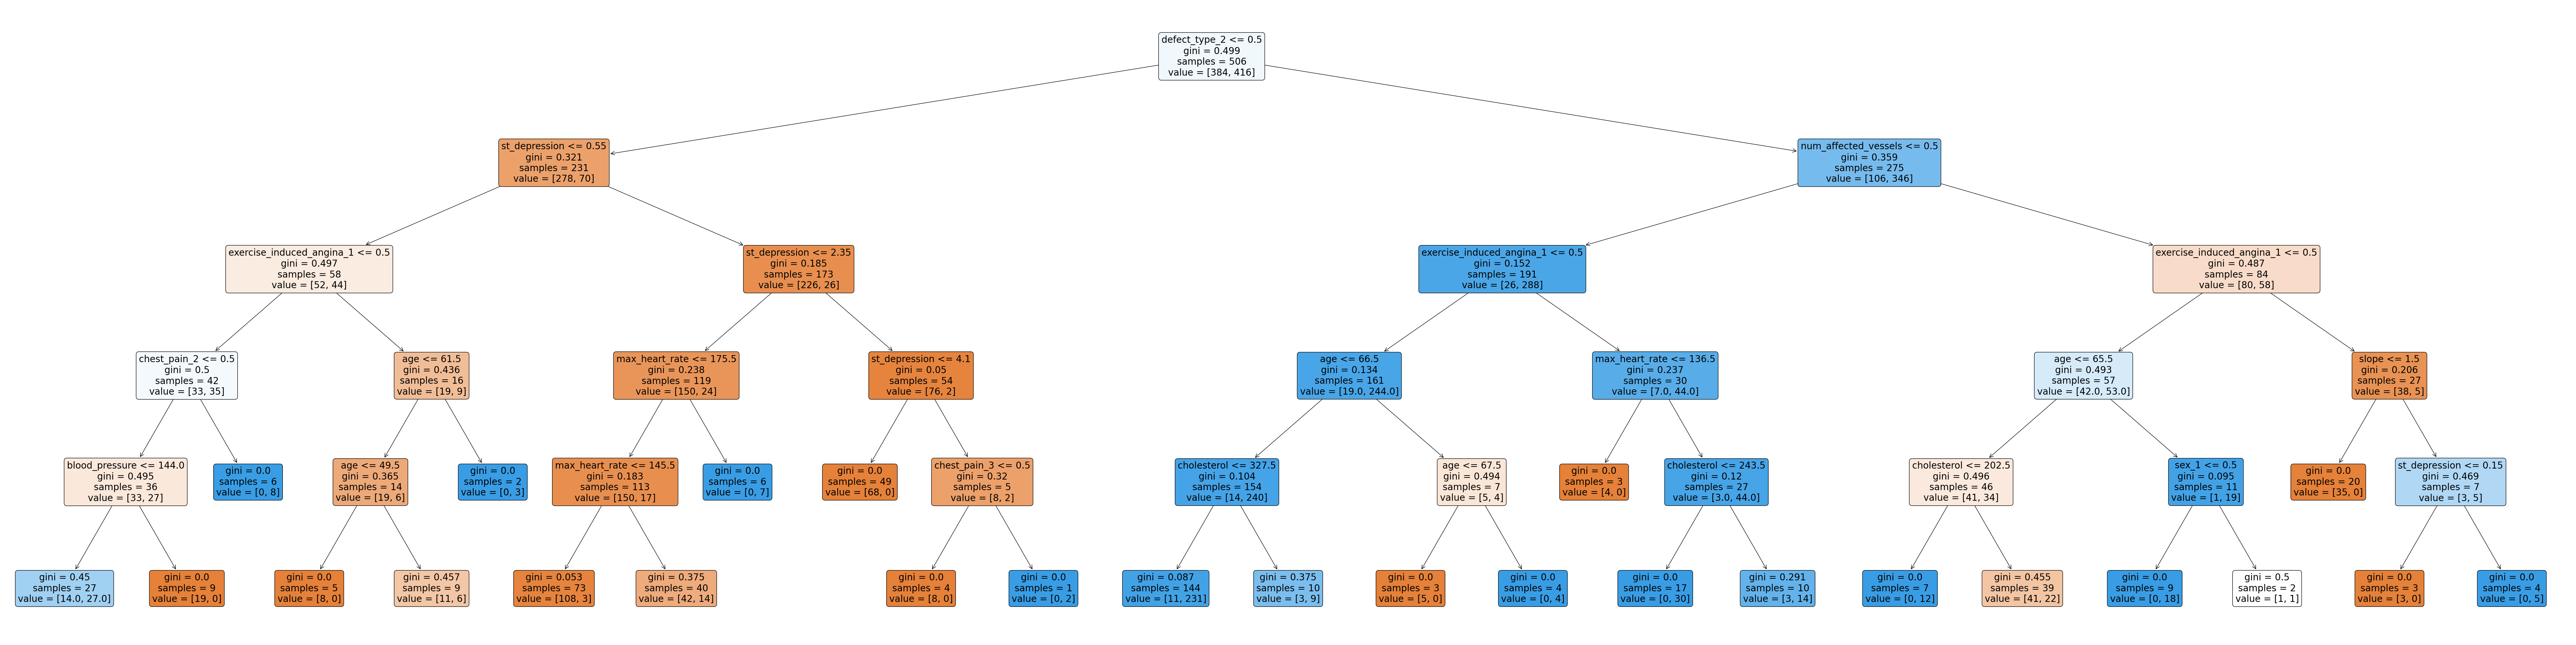

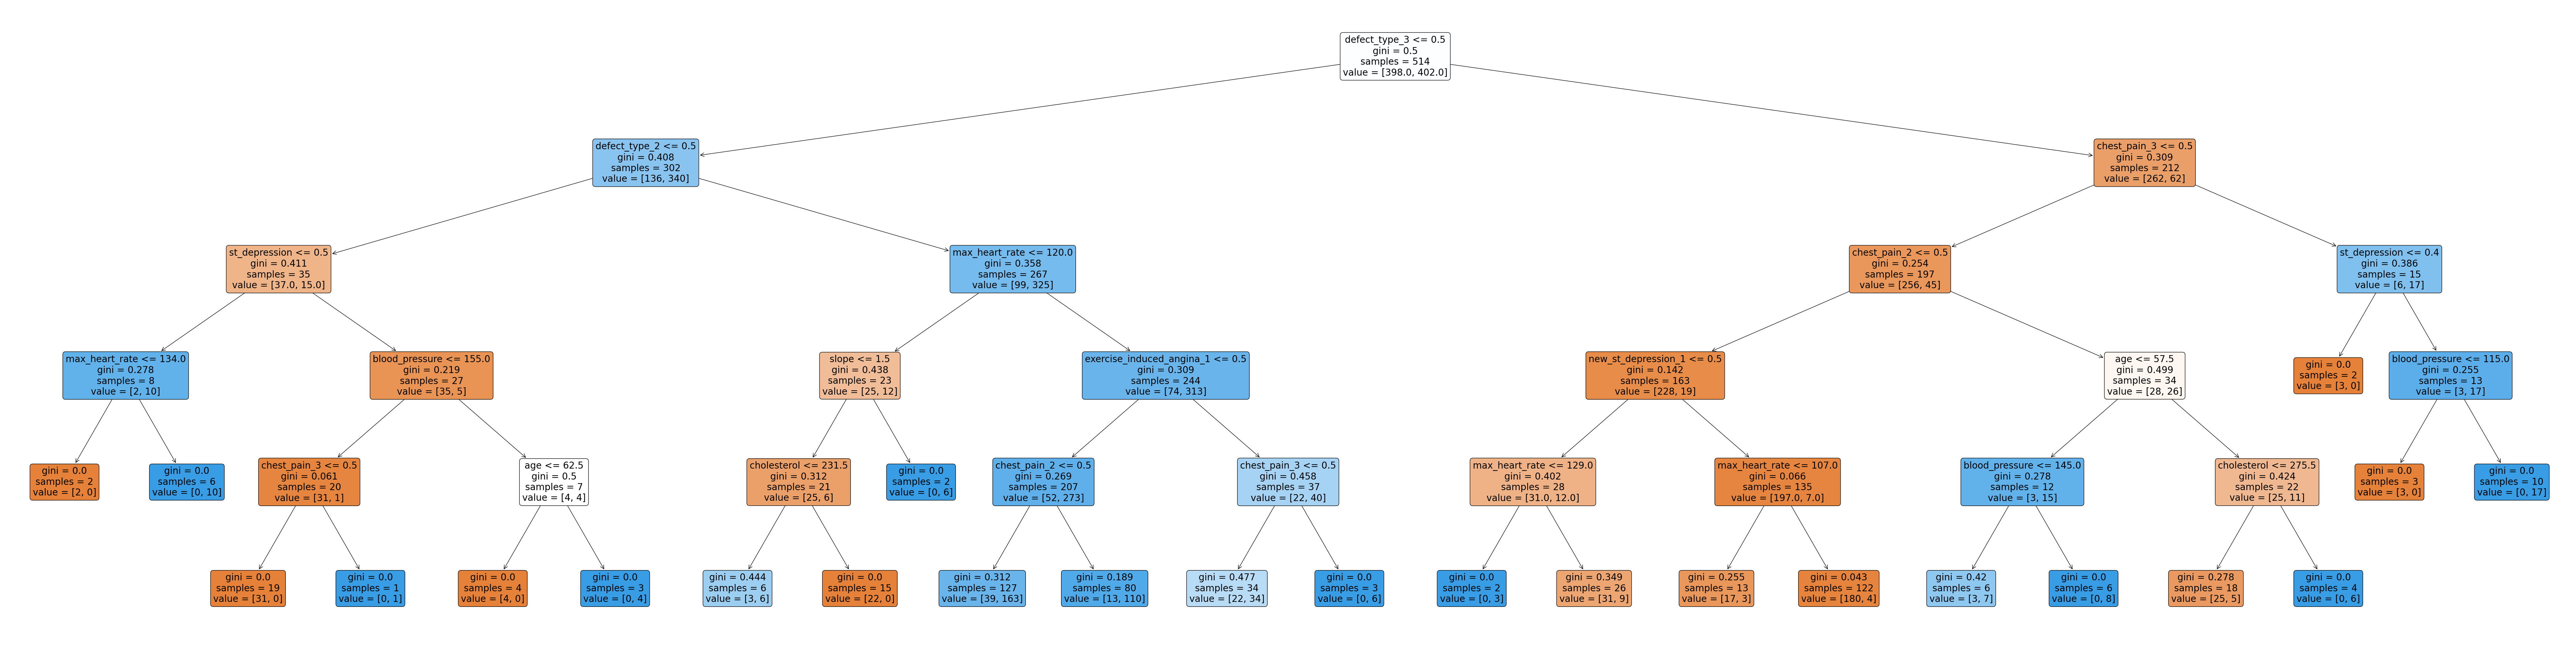

In [7]:
for tree in range(2):
    plt.figure(figsize=(100, 25))
    plot_tree(randomforest.estimators_[tree], feature_names=clean_data_encoded.columns.tolist(), filled=True, rounded=True, fontsize=20)
    plt.show()

We can show how accurate our forest is using a confusion matrix

<Axes: >

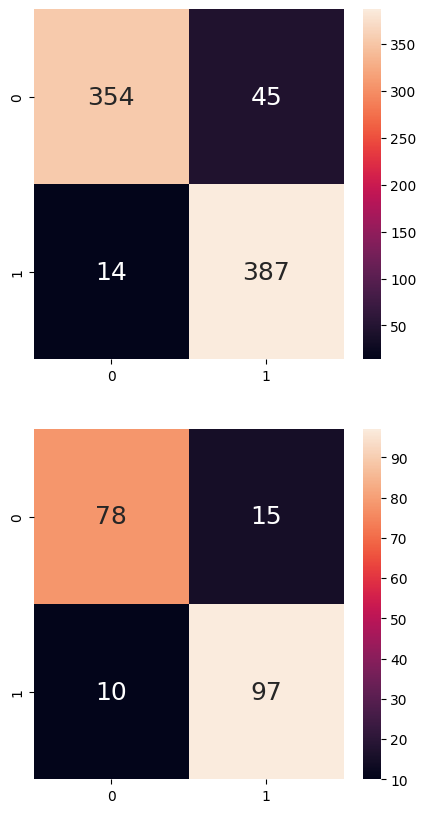

In [8]:
# Plot the two-way Confusion Matrix
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(5,10))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax1)
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax2)

## Hyperparameter tuning

Our algorithm is pretty decent, with an out of bag score of 0.86125 we can accurately predict the chances of a patient having heart disease most of the time. However, it can be even better, we initially just picked random values for the parameters such as max_depth = 5 and n_estimators(number of trees) = 10 and min_samples_split = 5.

 We can tune our hyperparameters to find optimal values to tweak our random forest's performance and produce an even better score.

In [9]:
parameter_values = {}
parameters = ["max_depth","n_estimators","min_samples_split"]

for parameter in parameters:
    parameter_values[parameter] = []

for i in range(2,10,2):
    parameter_values["min_samples_split"].append(i)

for i in range(5,30,5):
    parameter_values["n_estimators"].append(i)

for i in range(5,30,5):
    parameter_values["max_depth"].append(i)

## Hyperparameter Tuning: GridSearchCV
Model parameters are the weights and coefficients that the model's algorithm extracts from the data. On the other hand, hyperparameters are adjustable parameters that can be used to control the model's learning, such as the maximum depth for a decision tree. Hyperparameter optimisation is the tuning of these parameters to optimise the model's performance.

We shall use `GridSearchCV` from `sklearn` library to perform hyperparameter tuning. GridSearch performs an exhaustive searching over combinations of parameters and measures them against a specified score.

In addition, `GridSearchCV` also performs K-Fold cross validation. K-Fold cross validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds, and the model is trained and evaluated k times, using k - 1 folds for training and the last fold for testing each time. In every iteration, a different fold is used as the validation set. Performance metrics from each fold are averaged to estimate the model’s generalization performance. This allows us to train and test our model on the entire given dataset. It also allows us to assess our model's performance more accurately while preventing overfitting of our data.

The number of folds (k) is determined by the `cv` parameter in `GridSearchCV()`. Generally, the choice of k depends on the dataset size and desired bias-variance trade-off. Typical values are k = 5, k = 10 and k = 20. A larger k value can also result in longer computational times (k-folds cross validation has a time complexity of O(kN).

From *An Introduction to Statistical Learning* (2013, p. 184),

> To summarize, there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

We shall choose a k value of 5(smaller than decision trees as we have more parameters in random forest). 

Note that some penalties may not work with some solvers. As such, `FitFailedWarning` will be raised during gridsearch. We will also import the `warnings` library, `ConvergenceWarning` and `FitFailedWarning` from `sklearn.exceptions` to suppress convergence and fitfailed warnings.

In [10]:
# Please give code 10 seconds to run
grid_search = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid = parameter_values, cv = 5) 
grid_search.fit(X_train, y_train) 

# Print out the best estimated value
print(grid_search.best_estimator_) 

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

RandomForestClassifier(max_depth=15, n_estimators=15, random_state=42)


### Optimised Model

It appears the best estimator that GridSearchCV found was `RandomForestClassifier(max_depth=15, random_state=15)`. Note that many of the parameters are by default the best values(such as min_samples_split), and thus we do not need to state the parameters. 

We shall check the accuracy and out of bag score again based on these parameters. 

In [11]:
# Create random forest with optimal parameters
randomforest = RandomForestClassifier(max_depth = 15, random_state = 42, oob_score = True, n_estimators = 15)
randomforest.fit(X_train, y_train)

# Predict the Response corresponding to Predictors
y_test_pred = randomforest.predict(X_test)
y_train_pred = randomforest.predict(X_train)

# Print the Classification Accuracy for train data
print("Train Data")
print("Accuracy  :\t", randomforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix for train data
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(fpTrain + tnTrain)))
print("FNR Train :\t", (fnTrain/(fnTrain + tpTrain)))
print()

# Print the Classification Accuracy for test data
print("Test Data")
print("Accuracy  :\t", randomforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for test data
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Access the OOB Score
oob_score = randomforest.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Evaluating the model
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error: {mse}')

Train Data
Accuracy  :	 0.99875

TPR Train :	 0.9975062344139651
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0024937655860349127

Test Data
Accuracy  :	 0.97

TPR Test :	 0.9813084112149533
TNR Test :	 0.956989247311828

FPR Test :	 0.043010752688172046
FNR Test :	 0.018691588785046728
Out-of-Bag Score: 0.9775
Mean Squared Error: 0.03


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Our out of bag score with optimal parameters is now greater than our initial parameters (0.9775>0.86125), and a higher accuracy with the test set(0.97>0.875) indicating this it now able to better guess whether a patient has heart disease or not.

<Axes: >

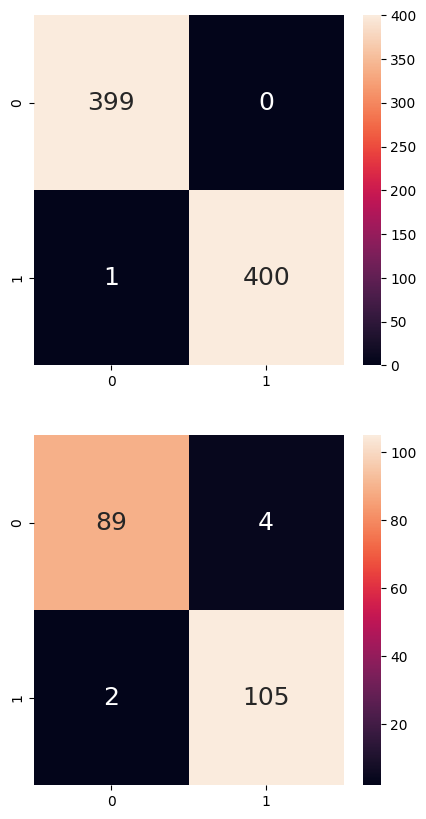

In [12]:
# Tree is not printed as it is too large
# Plot the two-way Confusion Matrix
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(5,10))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax1)
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax2)

## Feature Importance

Ranking the features according to how much they contribute to the final predictions can be achieved by using feature importance. Scikit has a built in attribute within the RandomForestClassifier class for this. 

In [13]:
importances = randomforest.feature_importances_
print(randomforest.feature_names_in_)

['age' 'blood_pressure' 'cholesterol' 'max_heart_rate' 'st_depression'
 'sex_1' 'chest_pain_1' 'chest_pain_2' 'chest_pain_3'
 'fasting_blood_sugar_1' 'resting_ecg_result_1' 'resting_ecg_result_2'
 'exercise_induced_angina_1' 'new_st_depression_1' 'defect_type_2'
 'defect_type_3' 'exercise_problem_1' 'slope' 'num_affected_vessels']


Here we plot the mean decrease in impurity of each variable. Node impurity measures how well the data in split in a node. In our case a very impure node indicates that we are unable to predict if a patient has heart disease using the variables up to that node. Mean decrease in impurity measures the decrease in node impurity from a parent node to a child node, indicating that it is a more important variable in predicting heart disease.

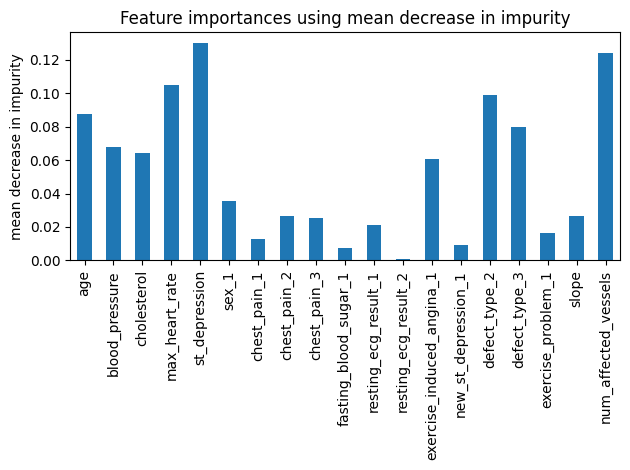

In [14]:
forest_importances = pd.Series(importances, index=randomforest.feature_names_in_)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using mean decrease in impurity")
ax.set_ylabel("mean decrease in impurity")
fig.tight_layout()

## Conclusion

As we can see defect_type_2(fixed defect), number of affected vessels(vessels coloured by fluoroscopy) and st_depression(ST depression induced by exercise relative to rest) were the best predictors in heart disease, while predictors such as chest_pain_1(no chest pain), fasting_blood_sugar_1(whether they had fasting blood sugar > 120 mg/dl) and resting_ecg_result_2 were poor predictors in seeing if a patient had heart disease